In [19]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot
plt = pyplot
import matplotlib
from page_xml_gen import page_sub as pxg
from PIL import Image, ImageDraw, ImageFont

pyplot.style.use('dark_background')

boeken_tifs = sorted(glob.glob('data/boeken/images/*.tif'))
boeken_xml = sorted(glob.glob('data/boeken/xml/*.xml'))
boeken_meta = pd.read_csv('data/boeken/meta.csv', skiprows=2).sort_values('Did').reset_index(drop=True)

kranten_tifs = sorted(glob.glob('data/kranten/images/*.tif'))
kranten_xml = sorted(glob.glob('data/kranten/xml/*.xml'))
kranten_meta = pd.read_csv('data/kranten/meta.csv', skiprows=2).sort_values('Did').reset_index(drop=True)

In [20]:
def drawTextRegion(textRegion, im):
    draw = ImageDraw.Draw(im)
    fnt = ImageFont.truetype('/usr/share/fonts/dejavu/DejaVuSansMono.ttf', 40)
    minX = min(point.x for point in textRegion.Coords.Point)
    minY = min(point.y for point in textRegion.Coords.Point)
#     text = textRegion.TextEquiv.Unicode
    text = textRegion.get_type()
    draw.text((minX, minY), text, font=fnt, fill=(255,0,0,128))
    for i, point in enumerate(textRegion.Coords.Point):
        previousPoint = textRegion.Coords.Point[i-1]
        draw.line((previousPoint.x, previousPoint.y, point.x, point.y), fill=255)
    del draw
    
def drawTextRegions(page, im):
    for textRegion in page.TextRegion:
        drawTextRegion(textRegion, im)

def binarize(img, rgb_sum=500):
    img_arr = np.copy(np.asarray(img))
    shape = img_arr.shape
    flat_arr = img_arr.reshape((-1, 3))
    mask = flat_arr.sum(1) > rgb_sum
    flat_arr[mask] = 255
    flat_arr[np.logical_not(mask)] = 0
    return Image.fromarray(flat_arr.reshape(shape))

def shower(tif_arr, xml_arr):
    def f(i, apply_binarize=False):
        img = Image.open(tif_arr[i])
        if apply_binarize:
            img = binarize(img)
        xml = pxg.parse(xml_arr[i], silence=True)
        drawTextRegions(xml.Page, img)
        return img
    
    return f
        
showBook = shower(boeken_tifs, boeken_xml)
showKrant = shower(kranten_tifs, kranten_xml)

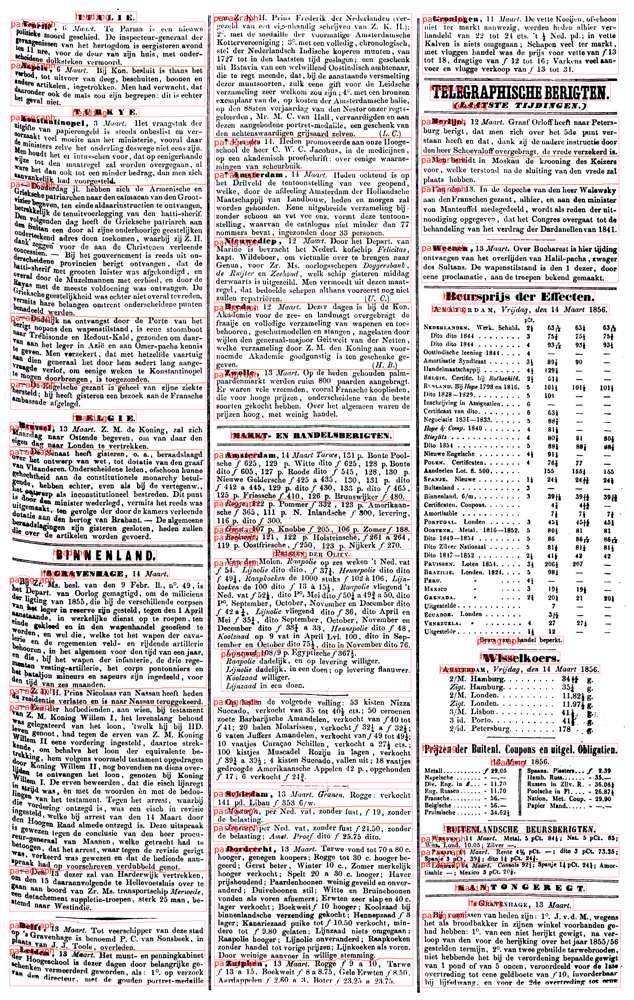

In [21]:
img = showKrant(2, True)
img.thumbnail((1000,1000), resample=Image.BICUBIC)
img

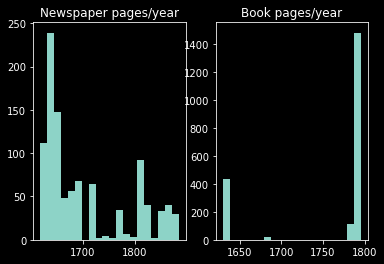

In [24]:
plt.subplot(1, 2, 1)
plt.hist(kranten_meta['Dyear'], bins=20)
plt.title("Newspaper pages/year")

plt.subplot(1, 2, 2)
plt.hist(boeken_meta['Dyear'], bins=20)
plt.title("Book pages/year")
plt.show()

In [23]:
boeken_meta.groupby(['Dtitle', 'Dyear']).size().to_frame('#pages')

,,#pages
Dtitle,Dyear,
Beschryvinge der stadt Utrecht.,1685,18
Extra tyding. Extract uit de resolutien der heeren Staaten van Holland [...] genomen op [...] 4. september 1786,1786,5
Feest en lydens stoffen voor de hervormde gemeente te Alkmaar,1787,99
"Gelegentheyt van 'sHertogen-Bosch, Vierde Hooft-Stadt van Brabandt",1630,438
Kort begrip der waereld-historie voor de jeugd. / By J.F. Martinet,1789,343
"Philadelphus aan zijnen broeder [...] ter verantwoording zijner leere aangaande de godlijke verbonden, de kerk, en den kinderdoop, tegen de brieven van den heere Aletophilus",1789,371
"Rechtsgeleerd advis in de zaak van den gewezen stadhouder, en over deszelfs schryven aan de gouverneurs van de Oost- en West-Indische bezittingen van den staat [...]. Ingelevert [...] op den 7 january 1796. / By B. Voorda et al",1796,88
"Verhaal van het levensgevaar, waar in zig drie Rotterdamsche burgers [...] bevonden hebben, te Utrecht; en het [...] geweld, hun aangedaan, door omtrent veertig leden van het vry corps aldaar",1784,11
"Verhandelingen van het Genootschap ter bevordering der heelkunde, te Amsterdam. : Part 1",1791,331
